In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:

# Load the BEAT WELL dataset
file_path = "/content/BEAT WELL DATASET.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display dataset info and sample rows
print("Dataset Info:")
print(df.info())
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1000 non-null   int64  
 1   gender               1000 non-null   int64  
 2   height_cm            1000 non-null   int64  
 3   weight_kg            1000 non-null   int64  
 4   bmi                  1000 non-null   float64
 5   systolic_bp          1000 non-null   int64  
 6   diastolic_bp         1000 non-null   int64  
 7   bp_category          1000 non-null   int64  
 8   smoking_status       1000 non-null   int64  
 9   alcohol_consumption  1000 non-null   int64  
 10  physical_activity    1000 non-null   int64  
 11  cholesterol_level    1000 non-null   int64  
 12  blood_sugar          1000 non-null   int64  
 13  family_history       1000 non-null   int64  
 14  risk_score           1000 non-null   int64  
dtypes: float64(1), int64(14)


In [3]:
# Define features and target
X = df.drop("risk_score", axis=1)  # Features
y = df["risk_score"]  # Target column

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and Testing Set Shapes:")
print(f"X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")


Training and Testing Set Shapes:
X_train: (800, 14), X_test: (200, 14)


In [5]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,         # Number of boosting rounds
    learning_rate=0.05,       # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    min_child_weight=1,       # Minimum sum of instance weight
    subsample=0.8,            # Fraction of samples used per tree
    colsample_bytree=0.8,     # Fraction of features used per tree
    random_state=42,
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)


In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n✅ Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ Model Evaluation Metrics:
Accuracy: 0.9600
Precision: 0.9562
Recall: 0.9600
F1 Score: 0.9569

Confusion Matrix:
[[  0   1   0]
 [  0  55   7]
 [  0   0 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.89      0.93        62
           2       0.95      1.00      0.98       137

    accuracy                           0.96       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.96      0.96      0.96       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

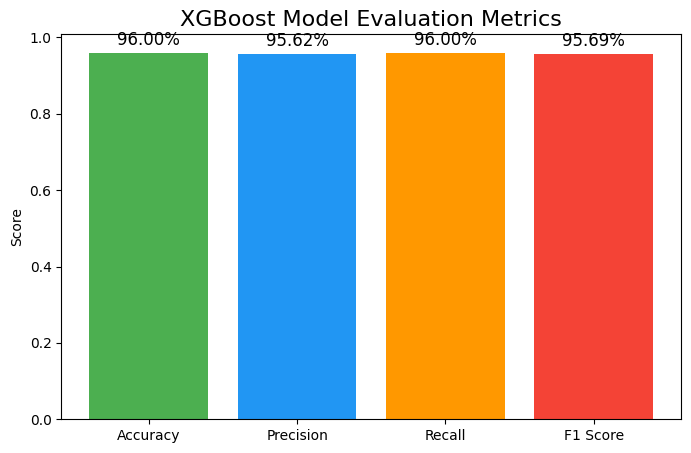

In [7]:
# Plotting accuracy
fig, ax = plt.subplots(figsize=(8, 5))

# Plot accuracy
ax.bar(["Accuracy", "Precision", "Recall", "F1 Score"],
       [accuracy, precision, recall, f1],
       color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'])

# Display accuracy in percentage
for i, v in enumerate([accuracy, precision, recall, f1]):
    ax.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', va='bottom', fontsize=12)

plt.title("XGBoost Model Evaluation Metrics", fontsize=16)
plt.ylabel("Score")
plt.show()


In [ ]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "xgb_model.pkl")

# Save the fitted StandardScaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved as xgb_model.pkl and scaler.pkl")
